Загрузка модели предсказания задачи регрессии из готовой библиотеки DeepChem

In [ ]:
import torch
import random
import numpy as np

In [ ]:
!pip install deepchem

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 58.7 MB/s eta 0:00:00


In [ ]:
import deepchem as dc

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Avalon import pyAvalonTools


def get_descriptors(data):
    molecules = data.smiles.apply(Chem.MolFromSmiles)
    morgan_generator = AllChem.GetMorganGenerator(radius=2)

    descriptor_list = []
    for mol in molecules:
        if mol is not None:
            morgan_fp = morgan_generator.GetFingerprint(mol)
            descriptor_list.append(morgan_fp.GetOnBits())
        else:
            descriptor_list.append([])

    data_descriptors = pd.DataFrame(descriptor_list)

    return data_descriptors.iloc[:, :-1]

In [ ]:
metlin_8_25 = pd.read_csv('METLIN_8_25_to_OHE_to_CNN')
hilic_oxana = pd.read_csv('HILIC_OXANA_to_OHE_to_CNN')

In [ ]:
metlin_8_25['rt'] = metlin_8_25['rt'].apply(lambda x: x*60)

In [ ]:
metlin_8_25

,smiles,rt
0,COC(=O)N1CCN(C(=O)Cc2ccc(Cl)c(Cl)c2)[C@H](CN2C...,687.8
1,CCN1CCC[C@@H]1CN=C(O)c1cc(S(=O)(=O)CC)c(N)cc1O...,590.7
2,Oc1cccc2c(O)nccc12 ...,583.6
3,OC1=NCC2(CCN(CCc3ccccc3)CC2)O1 ...,579.0
4,CC(C)(C)NC[C@H](O)COc1cccc2nc(O)[nH]c12 ...,603.1
...,...,...
77884,CCOc1ccc(OCC)c(NS(=O)(=O)c2ccc(/C=C/c3onc(C)c3...,946.4
77885,COCCCN=C(O)N1C[C@@H]2CN(S(=O)(=O)c3cccc(F)c3)C...,653.1
77886,COCCN=C(O)N1C[C@@H]2CN(S(=O)(=O)c3cccc(C)c3)C[...,648.2
77887,Cc1ccc(S(=O)(=O)N2C[C@@H]3CN(C(O)=Nc4ccccc4C)C...,783.9


Параметр λ (lambda): -0.7251337287528066
Преобразованные данные: 
[1.36697666 1.36556727 1.36544847 ... 1.36644592 1.36806956 1.36577852]


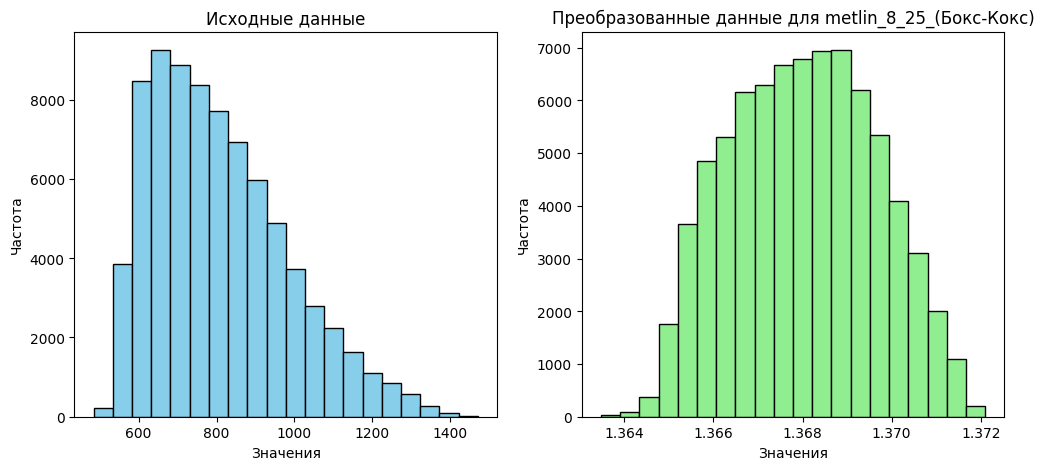

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

data_8_25 = metlin_8_25['rt']


tr_data_8_25, lambda_8_25 = stats.boxcox(data_8_25)

print(f'Параметр λ (lambda): {lambda_8_25}')
print('Преобразованные данные: ')
print(tr_data_8_25)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data_8_25, bins=20, color='skyblue', edgecolor='black')
plt.title('Исходные данные')
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(tr_data_8_25, bins=20, color='lightgreen', edgecolor='black')
plt.title('Преобразованные данные для metlin_8_25_(Бокс-Кокс)')
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.show()

In [ ]:
metlin_8_25['rt'] = tr_data_8_25

In [ ]:
metlin_8_25

,smiles,rt
0,COC(=O)N1CCN(C(=O)Cc2ccc(Cl)c(Cl)c2)[C@H](CN2C...,1.366977
1,CCN1CCC[C@@H]1CN=C(O)c1cc(S(=O)(=O)CC)c(N)cc1O...,1.365567
2,Oc1cccc2c(O)nccc12 ...,1.365448
3,OC1=NCC2(CCN(CCc3ccccc3)CC2)O1 ...,1.365370
4,CC(C)(C)NC[C@H](O)COc1cccc2nc(O)[nH]c12 ...,1.365769
...,...,...
77884,CCOc1ccc(OCC)c(NS(=O)(=O)c2ccc(/C=C/c3onc(C)c3...,1.369472
77885,COCCCN=C(O)N1C[C@@H]2CN(S(=O)(=O)c3cccc(F)c3)C...,1.366515
77886,COCCN=C(O)N1C[C@@H]2CN(S(=O)(=O)c3cccc(C)c3)C[...,1.366446
77887,Cc1ccc(S(=O)(=O)N2C[C@@H]3CN(C(O)=Nc4ccccc4C)C...,1.368070


In [ ]:
x_train = get_descriptors(metlin_8_25)

In [ ]:
x_train.shape

(77889, 85)

In [ ]:
x_train = x_train.iloc[:, :24].fillna(0)

In [ ]:
x_train.shape

(77889, 24)

In [ ]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,80,119,242,310,321,325,366,384,509,561,...,739.0,800.0,807.0,836.0,841.0,875.0,908.0,925.0,926.0,935.0
1,34,71,80,249,269,283,294,350,389,392,...,725.0,751.0,807.0,841.0,875.0,910.0,926.0,933.0,935.0,1019.0
2,106,378,400,440,787,807,843,1039,1088,1357,...,1602.0,1607.0,1690.0,1750.0,1831.0,1866.0,1873.0,2044.0,0.0,0.0
3,80,218,280,378,389,583,611,656,807,812,...,1060.0,1066.0,1088.0,1116.0,1145.0,1162.0,1199.0,1243.0,1280.0,1282.0
4,1,80,89,114,118,170,227,289,307,378,...,658.0,695.0,807.0,843.0,848.0,1039.0,1057.0,1088.0,1097.0,1114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77884,4,25,69,80,92,94,199,237,248,294,...,389.0,425.0,441.0,479.0,502.0,514.0,584.0,650.0,656.0,689.0
77885,13,80,144,149,230,272,308,319,350,389,...,585.0,650.0,656.0,695.0,699.0,725.0,739.0,757.0,800.0,807.0
77886,13,80,144,149,272,308,319,350,389,486,...,650.0,656.0,695.0,725.0,739.0,757.0,775.0,800.0,807.0,841.0
77887,18,149,235,308,319,350,374,389,585,650,...,757.0,800.0,807.0,852.0,869.0,926.0,935.0,1019.0,1057.0,1088.0


# Обучение на наборе данных metlin_8_25 с преобразованием Бокса-Кокса

In [ ]:
import numpy as np
import tensorflow as tf
import deepchem as dc
import random

def seed_all():
     np.random.seed(456)
     tf.random.set_seed(456)
     random.seed(456)

In [ ]:
seed_all()
# Load dataset with default 'scaffold' splitting
tasks, datasets, transformers = dc.molnet.load_bace_regression()

[11:38:10] DEPRECATION WARNING: please use MorganGenerator
[11:38:10] DEPRECATION WARNING: please use MorganGenerator
[11:38:10] DEPRECATION WARNING: please use MorganGenerator
[11:38:10] DEPRECATION WARNING: please use MorganGenerator
[11:38:10] DEPRECATION WARNING: please use MorganGenerator
[11:38:10] DEPRECATION WARNING: please use MorganGenerator
[11:38:10] DEPRECATION WARNING: please use MorganGenerator
[11:38:10] DEPRECATION WARNING: please use MorganGenerator
[11:38:10] DEPRECATION WARNING: please use MorganGenerator
[11:38:10] DEPRECATION WARNING: please use MorganGenerator
[11:38:10] DEPRECATION WARNING: please use MorganGenerator
[11:38:10] DEPRECATION WARNING: please use MorganGenerator
[11:38:10] DEPRECATION WARNING: please use MorganGenerator
[11:38:10] DEPRECATION WARNING: please use MorganGenerator
[11:38:10] DEPRECATION WARNING: please use MorganGenerator
[11:38:10] DEPRECATION WARNING: please use MorganGenerator
[11:38:10] DEPRECATION WARNING: please use MorganGenerat

In [ ]:
dir(dc.metrics)

['Metric',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'accuracy_score',
 'auc',
 'balanced_accuracy_score',
 'bedroc_score',
 'cohen_kappa_score',
 'concordance_index',
 'f1_score',
 'from_one_hot',
 'handle_classification_mode',
 'jaccard_index',
 'jaccard_score',
 'kappa_score',
 'mae_score',
 'matthews_corrcoef',
 'mean_absolute_error',
 'mean_squared_error',
 'metric',
 'normalize_labels_shape',
 'normalize_prediction_shape',
 'normalize_weight_shape',
 'pearson_r2_score',
 'pearsonr',
 'pixel_error',
 'prc_auc_score',
 'precision_recall_curve',
 'precision_score',
 'r2_score',
 'recall_score',
 'rms_score',
 'roc_auc_score',
 'score_function',
 'threshold_predictions',
 'to_one_hot',
 'top_k_accuracy_score']

In [ ]:
X1 = x_train.iloc[:75000, :]
X2 = x_train.iloc[75001:, :]

In [ ]:
X1 = np.array(X1)
X2 = np.array(X2)

In [ ]:
y1 = metlin_8_25['rt'].iloc[:75000]
y2 = metlin_8_25['rt'].iloc[75001:]

In [ ]:
y1 = np.array(y1)
y2 = np.array(y2)

In [ ]:
X1.shape

(75000, 24)

In [ ]:
X_train = X1  # входные данные
y_train = y1  # значения retention time

X_valid = X2   # валидационные входные данные
y_valid = y2   # значения retention time

In [ ]:
train_dataset = dc.data.NumpyDataset(X_train, y_train)
valid_dataset = dc.data.NumpyDataset(X_valid, y_valid)

In [ ]:
tasks = ["predict retention_time"]  # наша задача

In [ ]:
# Метрика
avg_mae_score = dc.metrics.Metric(dc.metrics.mae_score, np.mean)

In [ ]:
# Обучение модели
model = dc.models.MultitaskRegressor(
    len(tasks),
    n_features=24,
    layer_sizes=[500]
)

In [ ]:
# Обучение модели
model.fit(train_dataset)

0.031539750099182126

In [ ]:
# Оцениваем модель
train_scores = model.evaluate(train_dataset, [avg_mae_score])
print("Train scores:", train_scores)

valid_scores = model.evaluate(valid_dataset, [avg_mae_score])
print("Validation scores:", valid_scores)

Train scores: {'mean-mae_score': 0.06660492578923133}
Validation scores: {'mean-mae_score': 0.06155322386257277}


Проверочные данные hilic_oxana

In [ ]:
hilic_oxana = pd.read_csv('HILIC_OXANA_to_OHE_to_CNN')

In [ ]:
hilic_oxana

,smiles,rt
0,C1=NC=NN1 ...,4.6
1,C1(=NC(=NN1)N)N ...,7.6
2,C1=NN=CN1N ...,6.8
3,CC1=NC=NN1 ...,5.2
4,C1=NNN=C1 ...,3.4
5,C1=NNC(=N1)N ...,5.6
6,C1=CNN=C1 ...,3.4
7,CC1=CC=NN1 ...,3.5
8,CN1C=CC(=N1)N ...,4.5
9,CCC1=CC(=NN1)N ...,4.3


In [ ]:
hilic_oxana['rt'] = hilic_oxana['rt'].apply(lambda x: x*60)

In [ ]:
hilic_oxana

,smiles,rt
0,C1=NC=NN1 ...,276.0
1,C1(=NC(=NN1)N)N ...,456.0
2,C1=NN=CN1N ...,408.0
3,CC1=NC=NN1 ...,312.0
4,C1=NNN=C1 ...,204.0
5,C1=NNC(=N1)N ...,336.0
6,C1=CNN=C1 ...,204.0
7,CC1=CC=NN1 ...,210.0
8,CN1C=CC(=N1)N ...,270.0
9,CCC1=CC(=NN1)N ...,258.0


In [ ]:
x_oxana_train = get_descriptors(hilic_oxana)
x_oxana_train = x_oxana_train.fillna(0)

In [ ]:
x_oxana_train

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,378,433,489,609,695,713,1020.0,1114.0,1421.0,1603.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,74,242,378,409,697,1090,1104.0,1114.0,1171.0,1380.0,...,2004.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,281,378,645,932,935,1036,1171.0,1438.0,1698.0,1800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,74,126,134,319,378,489,609.0,838.0,1057.0,1114.0,...,1873.0,1967.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,42,346,378,609,650,1104,1114.0,1866.0,1873.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,74,126,182,378,489,609,697.0,1114.0,1171.0,1311.0,...,1873.0,1967.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,378,527,609,695,716,1088,1114.0,1312.0,1506.0,1628.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,74,315,378,552,609,678,1057.0,1114.0,1380.0,1387.0,...,1873.0,1883.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,62,201,378,587,935,1057,1084.0,1101.0,1145.0,1171.0,...,1762.0,1873.0,1956.0,2042.0,0.0,0.0,0.0,0.0,0.0,0.0
9,62,74,80,294,378,463,875.0,892.0,1057.0,1114.0,...,1380.0,1451.0,1457.0,1615.0,1799.0,1873.0,2004.0,0.0,0.0,0.0


In [ ]:
X_oxana_train = np.array(x_oxana_train)
y_oxana_train = np.array(hilic_oxana['rt'])

In [ ]:
y_oxana_train

array([276., 456., 408., 312., 204., 336., 204., 210., 270., 258., 444.,
       798., 936., 432., 642., 426., 282., 258., 234.])

In [ ]:
oxana_dataset = dc.data.NumpyDataset(X_oxana_train, y_oxana_train)

In [ ]:
res_oxana = model.predict(oxana_dataset)

In [ ]:
res_oxana

array([[[ 722.56665]],

       [[ 831.97815]],

       [[ 618.62115]],

       [[ 720.6492 ]],

       [[ 629.0442 ]],

       [[ 739.2682 ]],

       [[ 776.2128 ]],

       [[ 874.16174]],

       [[ 766.5254 ]],

       [[ 736.1613 ]],

       [[ 803.9243 ]],

       [[ 955.383  ]],

       [[ 832.2016 ]],

       [[ 615.692  ]],

       [[1381.7931 ]],

       [[ 720.9874 ]],

       [[ 705.2115 ]],

       [[ 743.7924 ]],

       [[ 374.50763]]], dtype=float32)

In [ ]:
def inverse_boxcox(transformed_data, lambda_value):
    if lambda_value == 0:
        return np.exp(transformed_data)  # Обратное преобразование для lambda = 0
    else:
        return (lambda_value * transformed_data + 1) ** (1 / lambda_value)  # Обратное преобразование для lambda != 0

In [ ]:
res_oxana = model.predict(oxana_dataset)

In [ ]:
res_oxana

array([[[ 722.56665]],

       [[ 831.97815]],

       [[ 618.62115]],

       [[ 720.6492 ]],

       [[ 629.0442 ]],

       [[ 739.2682 ]],

       [[ 776.2128 ]],

       [[ 874.16174]],

       [[ 766.5254 ]],

       [[ 736.1613 ]],

       [[ 803.9243 ]],

       [[ 955.383  ]],

       [[ 832.2016 ]],

       [[ 615.692  ]],

       [[1381.7931 ]],

       [[ 720.9874 ]],

       [[ 705.2115 ]],

       [[ 743.7924 ]],

       [[ 374.50763]]], dtype=float32)

In [ ]:
res_oxana = np.squeeze(res_oxana)

In [ ]:
res_oxana

array([ 722.56665,  831.97815,  618.62115,  720.6492 ,  629.0442 ,
        739.2682 ,  776.2128 ,  874.16174,  766.5254 ,  736.1613 ,
        803.9243 ,  955.383  ,  832.2016 ,  615.692  , 1381.7931 ,
        720.9874 ,  705.2115 ,  743.7924 ,  374.50763], dtype=float32)

In [ ]:
lambda_8_25

-0.7251337287528066

In [ ]:
def inverse_boxcox(transformed_data, lambda_value):
    # Проверяем, что все значения больше -1/lambda для серьезной ошибки
    if lambda_value == 0:
        return np.exp(transformed_data)  # Обратное преобразование для lambda = 0
    else:
        # Проверяем, чтобы избежать NaN
        adjusted_data = lambda_value * transformed_data + 1
        if np.any(adjusted_data <= 0):
            raise ValueError("Обратное преобразование невозможно, так как некоторые значения меньше или равны 0.")
        return adjusted_data ** (1 / lambda_value)

In [ ]:
result = inverse_boxcox(res_oxana, lambda_8_25)

ValueError: Обратное преобразование невозможно, так как некоторые значения меньше или равны 0.

In [ ]:
result

array([133.06001,  92.28154, 172.16837, 107.75891,  70.05085,  99.8384 ,
       188.7605 , 128.93227,  89.99656,  97.6745 , 202.07393, 146.03096,
        81.96238,  70.53529, 190.12323, 170.58414, 249.22751, 129.33177,
       212.83159], dtype=float32)

In [ ]:
criterion = nn.L1Loss()
preds = []
mae_bc = 0
for imgs, labels in oxana_dataset:
        labels = labels.unsqueeze(1) ## добавила
        pred = inverse_boxcox(model(imgs), lambda_8_25)
        mae_bc += criterion(pred, labels)
print(mae_bc / len(hilic_oxana))

NameError: name 'nn' is not defined

In [ ]:
valid_scores = model.evaluate(oxana_dataset, [avg_mae_score])
print("Validation scores:", valid_scores)

Validation scores: {'mean-mae_score': 387.9093981291118}


# Обучение на наборе данных metlin_0_8 c преобразованием Бокса-Кокса

In [ ]:
metlin_0_8 = pd.read_csv('METLIN_0_8_to_OHE_to_CNN')

In [ ]:
metlin_0_8['rt'] = metlin_0_8['rt'].apply(lambda x: x*60)

In [ ]:
metlin_0_8

,smiles,rt
0,CCSC(=N)N ...,93.5
1,CCN1CCc2[nH]c(=N)oc2CC1 ...,79.7
2,CN1CCC(c2c[nH]c3ccc(O)cc23)CC1 ...,94.2
3,N[C@H]1CCc2cc(O)c(O)cc2C1 ...,91.5
4,NNC(=O)c1ccc(O)cc1 ...,116.2
...,...,...
2063,Cc1cnc(C(O)=N[C@@H]2CCC[C@@H]2C(O)=NC2CCN(C)CC...,83.9
2064,CCC(=O)N1CCN([C@H]2CCN(CCN(C)C)C2=O)CC1 ...,78.9
2065,Cc1oc2c(c1C(O)=NCCCn1cccn1)CN(C)CC2 ...,81.0
2066,Cc1cnc(C(O)=N[C@@H]2CCC[C@@H]2C(O)=NCCN2CCOCC2...,81.9


Параметр λ (lambda): 0.4764232723697015
Преобразованные данные: 
[16.13778052 14.80177809 16.20270047 ... 14.93255795 15.02245515
 14.84213623]


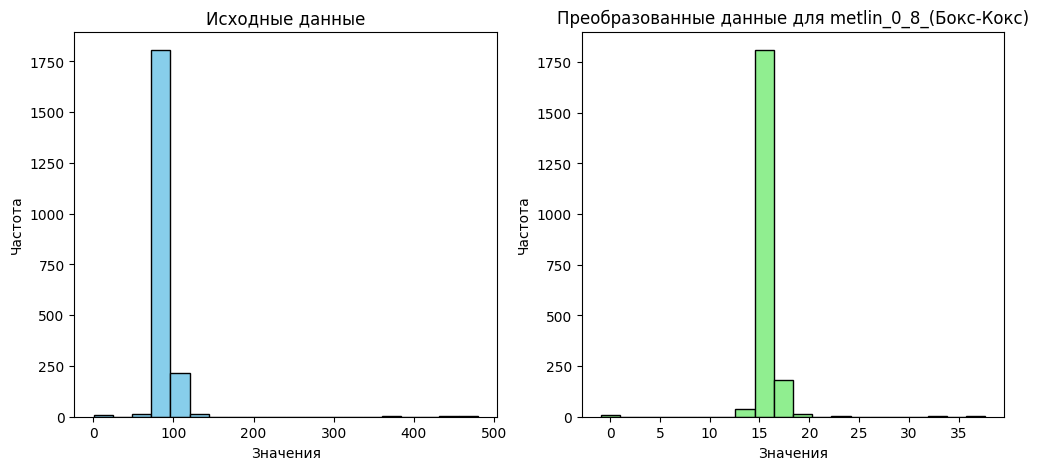

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

data_0_8 = metlin_0_8['rt']


tr_data_0_8, lambda_0_8 = stats.boxcox(data_0_8)

print(f'Параметр λ (lambda): {lambda_0_8}')
print('Преобразованные данные: ')
print(tr_data_0_8)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data_0_8, bins=20, color='skyblue', edgecolor='black')
plt.title('Исходные данные')
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(tr_data_0_8, bins=20, color='lightgreen', edgecolor='black')
plt.title('Преобразованные данные для metlin_0_8_(Бокс-Кокс)')
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.show()

In [ ]:
metlin_0_8['rt'] = tr_data_0_8

In [ ]:
metlin_0_8

,smiles,rt
0,CCSC(=N)N ...,16.137781
1,CCN1CCc2[nH]c(=N)oc2CC1 ...,14.801778
2,CN1CCC(c2c[nH]c3ccc(O)cc23)CC1 ...,16.202700
3,N[C@H]1CCc2cc(O)c(O)cc2C1 ...,15.950880
4,NNC(=O)c1ccc(O)cc1 ...,18.127459
...,...,...
2063,Cc1cnc(C(O)=N[C@@H]2CCC[C@@H]2C(O)=NC2CCN(C)CC...,15.220393
2064,CCC(=O)N1CCN([C@H]2CCN(CCN(C)C)C2=O)CC1 ...,14.720742
2065,Cc1oc2c(c1C(O)=NCCCn1cccn1)CN(C)CC2 ...,14.932558
2066,Cc1cnc(C(O)=N[C@@H]2CCC[C@@H]2C(O)=NCCN2CCOCC2...,15.022455


In [ ]:
x_train = get_descriptors(metlin_0_8)

In [ ]:
x_train = x_train.iloc[:, :24].fillna(0)

In [ ]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,80,116,140,165,294,623,653.0,807.0,910.0,1057.0,...,1966.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34,80,245,294,435,502,507.0,623.0,656.0,676.0,...,1114.0,1147.0,1252.0,1380.0,1480.0,1526.0,1604.0,1691.0,1738.0,1745.0
2,119,207,328,381,558,745,802.0,806.0,807.0,875.0,...,1019.0,1027.0,1057.0,1114.0,1145.0,1236.0,1313.0,1321.0,1325.0,1357.0
3,13,231,346,589,713,735,807.0,867.0,875.0,926.0,...,1325.0,1327.0,1380.0,1602.0,1607.0,1630.0,1738.0,1832.0,1873.0,0.0
4,80,486,650,745,807,1152,1171.0,1313.0,1380.0,1385.0,...,1750.0,1778.0,1794.0,1873.0,1917.0,1987.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,35,207,209,247,269,356,378.0,389.0,514.0,563.0,...,855.0,926.0,935.0,945.0,993.0,1019.0,1028.0,1057.0,1063.0,1145.0
2064,5,76,80,148,294,314,650.0,652.0,693.0,760.0,...,935.0,1009.0,1019.0,1021.0,1057.0,1089.0,1145.0,1163.0,1312.0,1325.0
2065,43,75,77,80,144,207,242.0,269.0,294.0,356.0,...,389.0,476.0,502.0,586.0,656.0,725.0,747.0,807.0,835.0,926.0
2066,35,70,80,144,209,247,269.0,356.0,378.0,389.0,...,662.0,689.0,725.0,807.0,855.0,926.0,935.0,945.0,950.0,1019.0


In [ ]:
X1 = x_train.iloc[:2000, :]
X2 = x_train.iloc[2001:, :]

In [ ]:
X1 = np.array(X1)
X2 = np.array(X2)

In [ ]:
y1 = metlin_0_8['rt'].iloc[:2000]
y2 = metlin_0_8['rt'].iloc[2001:]

In [ ]:
y1 = np.array(y1)
y2 = np.array(y2)

In [ ]:
X_train = X1   # входные данные
y_train = y1   # значения retention time

X_valid = X2   # валидационные входные данные
y_valid = y2   # значения retention time

In [ ]:
train_dataset = dc.data.NumpyDataset(X_train, y_train)
valid_dataset = dc.data.NumpyDataset(X_valid, y_valid)

In [ ]:
tasks = ["predict retention_time"]  # ваша задача

In [ ]:
# Метрика
avg_mae_score = dc.metrics.Metric(dc.metrics.mae_score, np.mean)

In [ ]:
# Обучение модели
model = dc.models.MultitaskRegressor(
    len(tasks),
    n_features=24,
    layer_sizes=[500]
)

In [ ]:
# Обучение модели
model.fit(train_dataset)

18.165557861328125

In [ ]:
# Оцениваем модель
train_scores = model.evaluate(train_dataset, [avg_mae_score])
print("Train scores:", train_scores)

valid_scores = model.evaluate(valid_dataset, [avg_mae_score])
print("Validation scores:", valid_scores)

# # Проверка оценок
# assert train_scores['mean-mae_score'] < 0.7, train_scores
# assert valid_scores['mean-mae_score'] > 0.3, valid_scores

Train scores: {'mean-mae_score': 2.3936197836757365}
Validation scores: {'mean-mae_score': 2.11101737641215}


In [ ]:
res_oxana = model.predict(oxana_dataset)

In [ ]:
res_oxana

array([[[ 6.200969 ]],

       [[15.692601 ]],

       [[12.787091 ]],

       [[12.143828 ]],

       [[18.419806 ]],

       [[12.740491 ]],

       [[ 7.7640257]],

       [[11.915594 ]],

       [[16.26677  ]],

       [[13.465999 ]],

       [[12.272476 ]],

       [[13.144904 ]],

       [[ 9.638885 ]],

       [[13.060853 ]],

       [[22.91976  ]],

       [[ 9.995516 ]],

       [[18.31838  ]],

       [[21.57253  ]],

       [[23.020285 ]]], dtype=float32)

In [ ]:
res_oxana = np.squeeze(res_oxana)

In [ ]:
res_oxana

array([ 6.200969 , 15.692601 , 12.787091 , 12.143828 , 18.419806 ,
       12.740491 ,  7.7640257, 11.915594 , 16.26677  , 13.465999 ,
       12.272476 , 13.144904 ,  9.638885 , 13.060853 , 22.91976  ,
        9.995516 , 18.31838  , 21.57253  , 23.020285 ], dtype=float32)

In [ ]:
def inverse_boxcox(transformed_data, lambda_value):
    # Проверяем, что все значения больше -1/lambda для серьезной ошибки
    if lambda_value == 0:
        return np.exp(transformed_data)  # Обратное преобразование для lambda = 0
    else:
        # Проверяем, чтобы избежать NaN
        adjusted_data = lambda_value * transformed_data + 1
        if np.any(adjusted_data <= 0):
            raise ValueError("Обратное преобразование невозможно, так как некоторые значения меньше или равны 0.")
        return adjusted_data ** (1 / lambda_value)

In [ ]:
result = inverse_boxcox(res_oxana, lambda_0_8)

In [ ]:
r = sum([abs(result[i] - y_oxana_train[i]) for i in range(18)])/19

In [ ]:
r

304.42522631193464

In [ ]:
y_oxana_train

array([276., 456., 408., 312., 204., 336., 204., 210., 270., 258., 444.,
       798., 936., 432., 642., 426., 282., 258., 234.])

# Обучение на наборе данных metlin_0_8 без преобразования Бокса-Кокса

In [ ]:
metlin_0_8 = pd.read_csv('METLIN_0_8_to_OHE_to_CNN')

In [ ]:
metlin_0_8['rt'] = metlin_0_8['rt'].apply(lambda x: x*60)

In [ ]:
metlin_0_8

,smiles,rt
0,CCSC(=N)N ...,93.5
1,CCN1CCc2[nH]c(=N)oc2CC1 ...,79.7
2,CN1CCC(c2c[nH]c3ccc(O)cc23)CC1 ...,94.2
3,N[C@H]1CCc2cc(O)c(O)cc2C1 ...,91.5
4,NNC(=O)c1ccc(O)cc1 ...,116.2
...,...,...
2063,Cc1cnc(C(O)=N[C@@H]2CCC[C@@H]2C(O)=NC2CCN(C)CC...,83.9
2064,CCC(=O)N1CCN([C@H]2CCN(CCN(C)C)C2=O)CC1 ...,78.9
2065,Cc1oc2c(c1C(O)=NCCCn1cccn1)CN(C)CC2 ...,81.0
2066,Cc1cnc(C(O)=N[C@@H]2CCC[C@@H]2C(O)=NCCN2CCOCC2...,81.9


In [ ]:
x_train = get_descriptors(metlin_0_8)

In [ ]:
x_train = x_train.iloc[:, :24].fillna(0)

In [ ]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,80,116,140,165,294,623,653.0,807.0,910.0,1057.0,...,1966.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34,80,245,294,435,502,507.0,623.0,656.0,676.0,...,1114.0,1147.0,1252.0,1380.0,1480.0,1526.0,1604.0,1691.0,1738.0,1745.0
2,119,207,328,381,558,745,802.0,806.0,807.0,875.0,...,1019.0,1027.0,1057.0,1114.0,1145.0,1236.0,1313.0,1321.0,1325.0,1357.0
3,13,231,346,589,713,735,807.0,867.0,875.0,926.0,...,1325.0,1327.0,1380.0,1602.0,1607.0,1630.0,1738.0,1832.0,1873.0,0.0
4,80,486,650,745,807,1152,1171.0,1313.0,1380.0,1385.0,...,1750.0,1778.0,1794.0,1873.0,1917.0,1987.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,35,207,209,247,269,356,378.0,389.0,514.0,563.0,...,855.0,926.0,935.0,945.0,993.0,1019.0,1028.0,1057.0,1063.0,1145.0
2064,5,76,80,148,294,314,650.0,652.0,693.0,760.0,...,935.0,1009.0,1019.0,1021.0,1057.0,1089.0,1145.0,1163.0,1312.0,1325.0
2065,43,75,77,80,144,207,242.0,269.0,294.0,356.0,...,389.0,476.0,502.0,586.0,656.0,725.0,747.0,807.0,835.0,926.0
2066,35,70,80,144,209,247,269.0,356.0,378.0,389.0,...,662.0,689.0,725.0,807.0,855.0,926.0,935.0,945.0,950.0,1019.0


In [ ]:
X1 = x_train.iloc[:2000, :]
X2 = x_train.iloc[2001:, :]

In [ ]:
X1 = np.array(X1)
X2 = np.array(X2)

In [ ]:
y1 = metlin_0_8['rt'].iloc[:2000]
y2 = metlin_0_8['rt'].iloc[2001:]

In [ ]:
y1 = np.array(y1)
y2 = np.array(y2)

In [ ]:
X_train = X1  # входные данные
y_train = y1  # значения retention time

X_valid = X2   # валидационные входные данные
y_valid = y2   # значения retention time

In [ ]:
train_dataset = dc.data.NumpyDataset(X_train, y_train)
valid_dataset = dc.data.NumpyDataset(X_valid, y_valid)

In [ ]:
tasks = ["predict retention_time"]  # наша задача

In [ ]:
# Метрика
avg_mae_score = dc.metrics.Metric(dc.metrics.mae_score, np.mean)

In [ ]:
# Обучение модели
model = dc.models.MultitaskRegressor(
    len(tasks),
    n_features=24,
    layer_sizes=[500]
)

In [ ]:
# Обучение модели
model.fit(train_dataset)

984.815078125

In [ ]:
# Оцениваем модель
train_scores = model.evaluate(train_dataset, [avg_mae_score])
print("Train scores:", train_scores)

valid_scores = model.evaluate(valid_dataset, [avg_mae_score])
print("Validation scores:", valid_scores)

Train scores: {'mean-mae_score': 15.69798161201477}
Validation scores: {'mean-mae_score': 13.154750744264518}


In [ ]:
res_oxana = model.predict(oxana_dataset)

In [ ]:
res_oxana

array([[[ 90.83052 ]],

       [[ 94.35654 ]],

       [[ 80.22602 ]],

       [[ 96.19996 ]],

       [[ 59.268536]],

       [[ 98.71054 ]],

       [[ 98.963234]],

       [[110.507835]],

       [[100.6339  ]],

       [[101.70711 ]],

       [[ 99.79704 ]],

       [[120.31252 ]],

       [[111.67906 ]],

       [[ 86.75019 ]],

       [[150.02557 ]],

       [[ 91.85251 ]],

       [[ 70.93711 ]],

       [[ 72.908195]],

       [[ 75.63056 ]]], dtype=float32)

In [ ]:
res_oxana = np.squeeze(res_oxana)

In [ ]:
res_oxana

array([ 90.83052 ,  94.35654 ,  80.22602 ,  96.19996 ,  59.268536,
        98.71054 ,  98.963234, 110.507835, 100.6339  , 101.70711 ,
        99.79704 , 120.31252 , 111.67906 ,  86.75019 , 150.02557 ,
        91.85251 ,  70.93711 ,  72.908195,  75.63056 ], dtype=float32)

In [ ]:
r = sum([abs(res_oxana[i] - y_oxana_train[i]) for i in range(18)])/19

In [ ]:
r

285.0701894258198

# Обучение на наборе данных metlin_8_25 без преобразования Бокса-Кокса

In [ ]:
metlin_8_25 = pd.read_csv('METLIN_8_25_to_OHE_to_CNN')

In [ ]:
metlin_8_25['rt'] = metlin_8_25['rt'].apply(lambda x: x*60)

In [ ]:
metlin_8_25

,smiles,rt
0,COC(=O)N1CCN(C(=O)Cc2ccc(Cl)c(Cl)c2)[C@H](CN2C...,687.8
1,CCN1CCC[C@@H]1CN=C(O)c1cc(S(=O)(=O)CC)c(N)cc1O...,590.7
2,Oc1cccc2c(O)nccc12 ...,583.6
3,OC1=NCC2(CCN(CCc3ccccc3)CC2)O1 ...,579.0
4,CC(C)(C)NC[C@H](O)COc1cccc2nc(O)[nH]c12 ...,603.1
...,...,...
77884,CCOc1ccc(OCC)c(NS(=O)(=O)c2ccc(/C=C/c3onc(C)c3...,946.4
77885,COCCCN=C(O)N1C[C@@H]2CN(S(=O)(=O)c3cccc(F)c3)C...,653.1
77886,COCCN=C(O)N1C[C@@H]2CN(S(=O)(=O)c3cccc(C)c3)C[...,648.2
77887,Cc1ccc(S(=O)(=O)N2C[C@@H]3CN(C(O)=Nc4ccccc4C)C...,783.9


In [ ]:
x_train = get_descriptors(metlin_8_25)

In [ ]:
x_train = x_train.iloc[:, :24].fillna(0)

In [ ]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,80,119,242,310,321,325,366,384,509,561,...,739.0,800.0,807.0,836.0,841.0,875.0,908.0,925.0,926.0,935.0
1,34,71,80,249,269,283,294,350,389,392,...,725.0,751.0,807.0,841.0,875.0,910.0,926.0,933.0,935.0,1019.0
2,106,378,400,440,787,807,843,1039,1088,1357,...,1602.0,1607.0,1690.0,1750.0,1831.0,1866.0,1873.0,2044.0,0.0,0.0
3,80,218,280,378,389,583,611,656,807,812,...,1060.0,1066.0,1088.0,1116.0,1145.0,1162.0,1199.0,1243.0,1280.0,1282.0
4,1,80,89,114,118,170,227,289,307,378,...,658.0,695.0,807.0,843.0,848.0,1039.0,1057.0,1088.0,1097.0,1114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77884,4,25,69,80,92,94,199,237,248,294,...,389.0,425.0,441.0,479.0,502.0,514.0,584.0,650.0,656.0,689.0
77885,13,80,144,149,230,272,308,319,350,389,...,585.0,650.0,656.0,695.0,699.0,725.0,739.0,757.0,800.0,807.0
77886,13,80,144,149,272,308,319,350,389,486,...,650.0,656.0,695.0,725.0,739.0,757.0,775.0,800.0,807.0,841.0
77887,18,149,235,308,319,350,374,389,585,650,...,757.0,800.0,807.0,852.0,869.0,926.0,935.0,1019.0,1057.0,1088.0


In [ ]:
X1 = x_train.iloc[:70000, :]
X2 = x_train.iloc[70001:, :]

In [ ]:
X1 = np.array(X1)
X2 = np.array(X2)

In [ ]:
y1 = metlin_8_25['rt'].iloc[:70000]
y2 = metlin_8_25['rt'].iloc[70001:]

In [ ]:
y1 = np.array(y1)
y2 = np.array(y2)

In [ ]:
X_train = X1  # входные данные
y_train = y1  # значения retention time

X_valid = X2   # валидационные входные данные
y_valid = y2   # значения retention time

In [ ]:
train_dataset = dc.data.NumpyDataset(X_train, y_train)
valid_dataset = dc.data.NumpyDataset(X_valid, y_valid)

In [ ]:
tasks = ["predict retention_time"]  # ваша задача

In [ ]:
# Метрика
avg_mae_score = dc.metrics.Metric(dc.metrics.mae_score, np.mean)

In [ ]:
# Обучение модели
model = dc.models.MultitaskRegressor(
    len(tasks),
    n_features=24,
    layer_sizes=[500]
)

In [ ]:
# Обучение модели
model.fit(train_dataset)

57324.695

In [ ]:
# Оцениваем модель
train_scores = model.evaluate(train_dataset, [avg_mae_score])
print("Train scores:", train_scores)

valid_scores = model.evaluate(valid_dataset, [avg_mae_score])
print("Validation scores:", valid_scores)

Train scores: {'mean-mae_score': 181.02225126246861}
Validation scores: {'mean-mae_score': 158.21721693739204}


In [ ]:
res_oxana = model.predict(oxana_dataset)

In [ ]:
res_oxana

array([[[ 556.6185 ]],

       [[ 782.2744 ]],

       [[ 406.41846]],

       [[ 702.51935]],

       [[ 449.16342]],

       [[ 687.9944 ]],

       [[ 591.00616]],

       [[ 811.9839 ]],

       [[ 703.27014]],

       [[ 711.9115 ]],

       [[ 615.11884]],

       [[ 873.4851 ]],

       [[ 735.1066 ]],

       [[ 591.57385]],

       [[1424.4534 ]],

       [[ 556.1645 ]],

       [[ 517.34155]],

       [[ 544.82275]],

       [[ 305.32303]]], dtype=float32)

In [ ]:
res_oxana = np.squeeze(res_oxana)

In [ ]:
res_oxana

array([ 556.6185 ,  782.2744 ,  406.41846,  702.51935,  449.16342,
        687.9944 ,  591.00616,  811.9839 ,  703.27014,  711.9115 ,
        615.11884,  873.4851 ,  735.1066 ,  591.57385, 1424.4534 ,
        556.1645 ,  517.34155,  544.82275,  305.32303], dtype=float32)

In [ ]:
r = sum([abs(res_oxana[i] - y_oxana_train[i]) for i in range(18)])/19

In [ ]:
r

290.21982453998766

In [ ]:
y_oxana_train

array([276., 456., 408., 312., 204., 336., 204., 210., 270., 258., 444.,
       798., 936., 432., 642., 426., 282., 258., 234.])